# 이미지 생성형 모델

# GAN

2025-04-27 19:13:56.589821: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 19:13:56.599572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745748836.609931  473681 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745748836.613159  473681 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745748836.621528  473681 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │       865,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

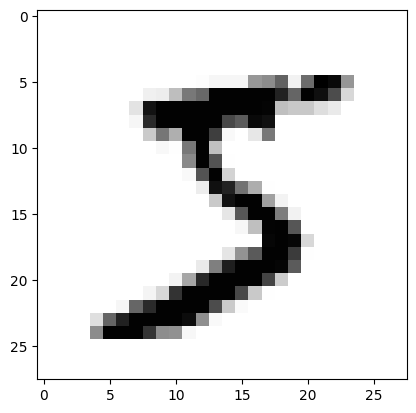

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


/home/kunsu/miniconda3/envs/fast/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


epoch:0  d_loss:0.7477  g_loss:0.7102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


E0000 00:00:1745748841.332230  473681 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/functional_17_1/sequential_1_2/activation_2_1/leaky_re_lu_3_1/LeakyRelu/LeakyReluGrad' exist for missing node 'functional_17_1/sequential_1_2/conv2d_3_1/BiasAdd'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:1  d_loss:0.7376  g_loss:0.7048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:2  d_loss:0.7326  g_loss:0.6961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:3  d_loss:0.7297  g_loss:0.6889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:4  d_loss:0.7281  g_loss:0.6868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:5  d_loss:0.7284  g_loss:0.6821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
epoch:6  d_loss:0.7290  g_loss:0.6792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
epoch:7  d_loss:0.7293  g_loss:0.6767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:8  d_loss:0.7306  g_loss:0.6735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:9  d_loss:0.7315  g_loss:0.6712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:10  d_loss:0.7317  g_loss:0.6704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:11  d_loss:0.7320  g_loss:0.6695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
epoch:12  d_loss:0.7328  g_loss:0.6677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
epoch:13  d_loss:0.7337  g_loss:0.6662
1/1 ━━━━

KeyboardInterrupt: 

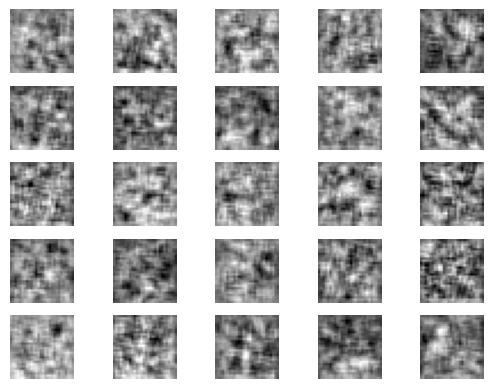

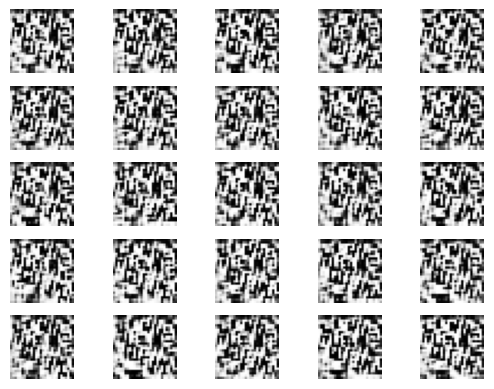

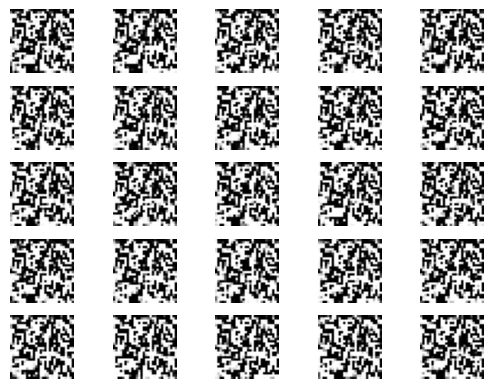

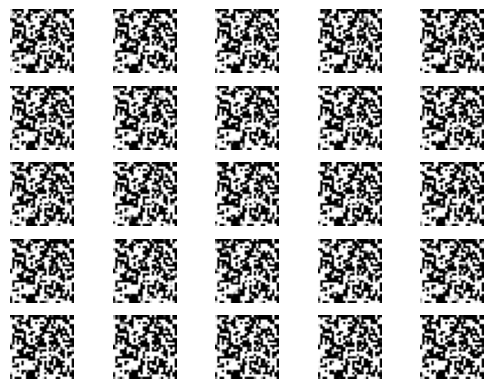

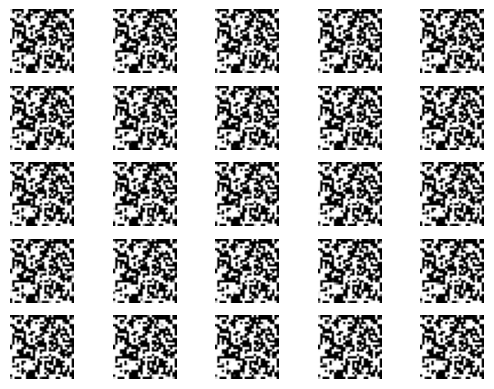

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 생성자 모델 파트
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding="same"))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding="same", activation="tanh"))

# 판별자 모델 파트
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.trainable = True
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False

# 생성자와 판별자 모델을 연결하여 gan 모델을 만듦
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")
gan.summary()


# 신경망을 실행시키는 함수를 만듦
def gan_train(epoch, batch_size, saving_interval):

    # MNIST 데이터를 로드

    (X_train, _), (_, _) = mnist.load_data()  # 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 로드

    # 데이터 확인
    plt.imshow(X_train[0], cmap="Greys")
    plt.show()

    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
    X_train = (
        X_train - 127.5
    ) / 127.5  # 픽셀 값은 0에서 255 사이의 값. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바꿈
    # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for i in range(epoch):
        # 실제 데이터를 판별자에 입력
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 가상 이미지를 판별자에 입력
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 판별자와 생성자의 오차를 계산
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # 실제 이미지와 가상 이미지에 대한 판별자의 오차를 평균냄
        g_loss = gan.train_on_batch(noise, true)  # 생성자를 학습 (가상 이미지를 실제 이미지로 잘 속이도록 학습)

        # (2025년 1월 17일 업데이트) 만약 train_on_batch() 결과가 리스트이면 첫 번째 값 사용
        if isinstance(d_loss, list):
            d_loss = d_loss[0]
        if isinstance(g_loss, list):
            g_loss = g_loss[0]

        print("epoch:%d" % i, " d_loss:%.4f" % d_loss, " g_loss:%.4f" % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 만들어진 이미지들은 gan_images 폴더에 저장
        if i % saving_interval == 0:
            # r, c = 5, 5
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)

            # Rescale images 0 - 1
            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap="gray")
                    axs[j, k].axis("off")
                    count += 1
            fig.savefig("./gan_output/gan_mnist_%d.png" % i)


gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("./gan_output", exist_ok=True)

# 생성자 모델
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding="same"))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding="same", activation="tanh"))

# 판별자 모델
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

# 판별자 먼저 컴파일
discriminator.trainable = True
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

# GAN 모델
discriminator.trainable = False
ginput = Input(shape=(100,))
gen_img = generator(ginput)
dis_output = discriminator(gen_img)
gan = Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))


def gan_train(epoch, batch_size, saving_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for i in range(epoch):
        # 1. 판별자 학습
        discriminator.trainable = True
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 2. 생성자 학습 (GAN)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, true)

        print("epoch:%d" % i, " d_loss:%.4f" % d_loss, " g_loss:%.4f" % g_loss)

        if i % saving_interval == 0:
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)
            gen_imgs = 0.5 * gen_imgs + 0.5
            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap="gray")
                    axs[j, k].axis("off")
                    count += 1
            fig.savefig("./gan_output/gan_mnist_%d.png" % i)
            plt.close()


gan_train(2001, 32, 200)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


E0000 00:00:1745748923.088653  473681 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential_3_1/leaky_re_lu_7_1/LeakyRelu/LeakyReluGrad' exist for missing node 'sequential_3_1/conv2d_7_1/BiasAdd'.


epoch:0  d_loss:0.6975  g_loss:0.6324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
epoch:1  d_loss:0.6568  g_loss:0.6186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
epoch:2  d_loss:0.6298  g_loss:0.5965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:3  d_loss:0.6070  g_loss:0.5725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:4  d_loss:0.5898  g_loss:0.5474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
epoch:5  d_loss:0.5768  g_loss:0.5229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:6  d_loss:0.5669  g_loss:0.5007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:7  d_loss:0.5588  g_loss:0.4819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:8  d_loss:0.5522  g_loss:0.4643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
epoch:9  d_loss:0.5468  g_loss:0.4509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
epoch:10  d_loss:0.5422  g_loss:0.4387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
epoch:11  d_loss:0.5378  g_loss:0.4293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
epoch:12  d_loss:0.5340  g_loss:0.4212
1/1 ━━━━━

# 오토인코더  
이미지의 특징을 추출

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋 로드

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255

# 생성자 모델
autoencoder = Sequential()

# 인코딩 파트
autoencoder.add(Conv2D(16, kernel_size=3, padding="same", input_shape=(28, 28, 1), activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same"))
autoencoder.add(Conv2D(8, kernel_size=3, activation="relu", padding="same"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same"))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding="same", activation="relu"))

# 디코딩 파트
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation="relu"))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))

# 전체 구조를 확
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
  9/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.6791 

2025-04-27 18:16:13.274284: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.3170 - val_loss: 0.1410
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1341 - val_loss: 0.1192
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1175 - val_loss: 0.1105
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1106 - val_loss: 0.1055
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1057 - val_loss: 0.1020
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1028 - val_loss: 0.0993
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0997 - val_loss: 0.0969
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0976 - val_loss: 0.0952
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0959 - val_loss: 0.0941
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0949 - val_loss: 0.0929
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0938 - val_loss: 0.0920
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/ste

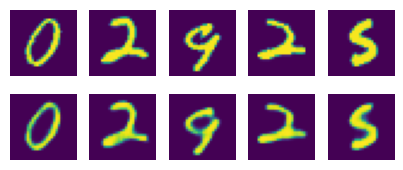

In [5]:
# 컴파일 및 학습을 하는 파트
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 파트
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옴
ae_imgs = autoencoder.predict(X_test)  # 앞서 만든 오토인코더 모델에 넣음

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis("off")
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis("off")
plt.show()